In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
from scipy.sparse import csc_matrix
import anndata

In [2]:
adata = sc.read('/Users/dominik.klein/data/E14-E15_adata_filtered_rmDoublets_sctNormalized_WNN_embedded_initialAnno_new_annotation.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 16918 × 14663
    obs: 'n_counts', 'sample', 'int_id', 'reporter', 'log_cell_probs', 'cell_barcodes_du', 'cell_barcodes_cr', 'cell_barcodes', 'log_counts', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'total_counts_rank', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'log_nCount_ATAC', 'log_nFeature_ATAC', 'scrublet_scores', 'scrublet_doublets', 'scrublet_doublets_cat', 'dd_doublets', 'dd_scores', 'dd_log_p_values', 'dd_voting_average', 'dd_-log_p_values', 'dd_doublets_cat', 'pANN', 'DF_classifications_1', 'DF_classifications_2', 'pANN_SCT', 'DF_SCT_classifications_1', 'DF_SCT_classifications_2', 'df_doublets',

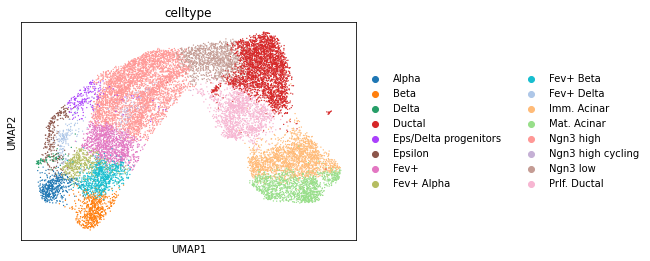

In [4]:
sc.pl.embedding(adata, basis="umap", color="celltype")

In [5]:
adata.obsm["X_umap"] = adata.obsm["umap"].copy()

In [6]:
adata.obsm["X_umap_GEX"][:,0] = -adata.obsm["X_umap_GEX"][:,0]  # make `direction` consistent

In [7]:
adata_raw_counts=sc.read('/Users/dominik.klein/data/E14-E15_adata_filtered_rmDoublets.h5ad')

In [8]:
adata_raw_counts = adata_raw_counts[adata.obs.index, adata.var.index]

In [9]:
(adata_raw_counts.X == adata_raw_counts.X.astype("int")).all()

ArrayView(True)

In [10]:
adata.X = csc_matrix(adata_raw_counts.X.copy())

In [11]:
sc.pp.log1p(adata)

In [12]:
adata.layers["log_counts"] = adata.X.copy()
adata.X = csc_matrix(adata_raw_counts.X.copy())

In [13]:
adata.obsp["connectivities_wnn"] = adata.obsp["connectivities"].copy()
adata.obsp["distances_wnn"] = adata.obsp["distances"].copy()

In [14]:
for layer in adata.layers:
    if not isinstance(adata.layers[layer], csc_matrix):
        adata.layers[layer] = csc_matrix(adata.layers[layer])

In [15]:
var_to_del = ['genome', 'gene_ids-0', 'n_cells-0', 'ambient_genes-0', 'is_ambient-0', 'n_cells_by_counts-0', 
              'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'gene_ids-1', 
              'n_cells-1', 'ambient_genes-1', 'is_ambient-1', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 
              'total_counts-1', 'log1p_total_counts-1', 'n_cells', 'sct.detection_rate', 'sct.gmean', 'sct.variance', 'sct.residual_variance', 'sct.variable', 
              'highly_variable']


In [16]:
layers_to_del = ["scran_counts", "sct_counts", "sct_scale_data"]

In [17]:
obs_cols_to_del = ['leiden_gex_graph', 'leiden_ATAC_graph', 'leiden_wnn_graph', 'umap_GEX_1', 'umap_GEX_2', 
                   'umap_ATAC_1', 'umap_ATAC_2', 'leiden_sub', 'leiden_sub1', 'leiden_sub2', 'leiden_sub3', 
                   'leiden_sub4', 'leiden_sub5', 'leiden_sub6', 'leiden_sub7', 'leiden_sub8', 'leiden_sub9', 
                   'leiden_sub10', 'leiden_sub11', 'leiden_sub12', 'leiden_sub13', 'leiden_sub14', 'leiden_sub15', 
                   'leiden_sub16', 'leiden_sub17', 'leiden_sub18', 'int_id', 'reporter', 'log_cell_probs', 
                   'cell_barcodes_du', 'cell_barcodes_cr', 'cell_barcodes', 'log_counts',
                  'scDblFinder.score', 'hybrid_class', 'hybrid_score', 'scDblFinder.class.sct', 'scDblFinder.score.sct', 'hybrid_class_sct', 'hybrid_score_sct', 'sdf_doublets', 'scds_doublets',
                  'total_counts_rank', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'orig.ident',
                  'log_nCount_ATAC', 'log_nFeature_ATAC', 'scrublet_scores', 'scrublet_doublets', 'scrublet_doublets_cat', 'dd_doublets', 'dd_scores', 'dd_log_p_values', 'dd_voting_average', 'dd_-log_p_values', 'dd_doublets_cat', 'pANN', 'DF_classifications_1', 'DF_classifications_2', 
                   'pANN_SCT', 'DF_SCT_classifications_1', 'DF_SCT_classifications_2', 'df_doublets', 'scDblFinder.class', 'doublet_calls', 'final_doublets', 'final_doublets_cat', 'batch', 'size_factors', 'mt_frac_raw', 'rp_frac_raw', 'n_genes_raw', 'log_genes_raw', 'n_counts_raw', 'log_counts_raw',
                  'leiden_combined', 'tmp', 'leiden_sub19']


In [18]:
uns_to_del = ['dendrogram_leiden_sub1', 'dendrogram_leiden_sub12', 'dendrogram_leiden_sub14', 'dendrogram_leiden_sub15', 
              'dendrogram_leiden_sub16', 'dendrogram_leiden_sub17', 'dendrogram_leiden_sub18', 'dendrogram_leiden_sub2', 
              'dendrogram_leiden_sub3', 'dendrogram_leiden_sub4', 'dendrogram_leiden_sub5', 'dendrogram_leiden_sub6', 
              'dendrogram_leiden_sub7', 'dendrogram_leiden_sub8', 'dendrogram_leiden_sub9', 'final_doublets_cat_colors', 
              'leiden_ATAC_graph_colors', 'leiden_colors', 'leiden_gex_graph_colors', 'leiden_sub10_colors', 
              'leiden_sub11_colors', 'leiden_sub12_colors', 'leiden_sub13_colors', 'leiden_sub14_colors', 
              'leiden_sub15_colors', 'leiden_sub16_colors', 'leiden_sub17_colors', 'leiden_sub18_colors', 
              'leiden_sub1_colors', 'leiden_sub2_colors', 'leiden_sub3_colors', 'leiden_sub4_colors', 'leiden_sub5_colors', 
              'leiden_sub6_colors', 'leiden_sub7_colors', 'leiden_sub8_colors', 'leiden_sub9_colors', 'leiden_sub_colors', 
              'leiden_wnn_graph_colors', 'dendrogram_leiden_sub19', 'leiden', 'leiden_combined_colors', 'leiden_sub19_colors', 'neighbors_wnn', 'pca', 'reporter_colors', 'sample_colors', 'tmp_colors', 'umap', 'log1p']

In [19]:
obsm_to_del = ['X_pca', 'X_pca_wsnn', 'X_spca_wsnn', 'X_umap_wsnn', 'umap', 'umap_ATAC', 'umap_GEX', 'lsi_full', 'lsi_red']

In [20]:
for el in var_to_del:
    del adata.var[el]

In [21]:
for el in layers_to_del:
    del adata.layers[el]

In [22]:
for col in obs_cols_to_del:
    del adata.obs[col]

In [23]:
for el in uns_to_del:
    if el in adata.uns:
        del adata.uns[el]

In [24]:
adata_lsi = sc.read("/Users/dominik.klein/data/E14-E15_adata_filtered_rmDoublets_lsi_peaks_to_adata.h5ad")

In [25]:
adata_lsi

AnnData object with n_obs × n_vars = 16978 × 1
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'doublet_calls', 'final_doublets', 'final_doublets_cat', 'nCount_peaks', 'nFeature_peaks', 'sample', 'peaks_snn_res.0.8', 'seurat_clusters'
    obsm: 'lsi_full', 'lsi_red'

In [26]:
def rename_index(x):
    prefix, barcode = x.split("_")
    if prefix == "E14-5":
        new_suffix="0"
    elif prefix == "E15-5":
        new_suffix="1"
    else:
        raise ValueError("no match")
    return barcode+"-"+new_suffix

In [27]:
adata_lsi.obs["old_index"] = adata_lsi.obs.index
adata_lsi.obs["index_adapted"] = adata_lsi.obs["old_index"].apply(rename_index)

In [28]:
adata_lsi_adapted = adata_lsi[adata_lsi.obs["index_adapted"].isin(adata.obs.index)]

In [29]:
adata_lsi_adapted.obs.set_index("index_adapted", inplace=True)

In [30]:
np.all(adata_lsi_adapted.obs.index == adata.obs.index)

True

In [31]:
adata.obsm["lsi_full"] = adata_lsi_adapted.obsm["lsi_full"]
adata.obsm["lsi_red"] = adata_lsi_adapted.obsm["lsi_red"]

In [32]:
adata

AnnData object with n_obs × n_vars = 16918 × 14663
    obs: 'n_counts', 'sample', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'S_score', 'G2M_score', 'phase', 'proliferation', 'celltype'
    var: 'feature_types'
    uns: 'celltype_colors', 'neighbors'
    obsm: 'X_pca', 'X_pca_wsnn', 'X_spca_wsnn', 'X_umap', 'X_umap_ATAC', 'X_umap_GEX', 'X_umap_wsnn', 'umap', 'umap_ATAC', 'umap_GEX', 'lsi_full', 'lsi_red'
    varm: 'PCs', 'PCs_wsnn', 'SPCA_wsnn'
    layers: 'log_raw_counts', 'raw_counts', 'sct_logcounts', 'log_counts'
    obsp: 'connectivities', 'distances', 'connectivities_wnn', 'distances_wnn'

In [33]:
adata_2 = sc.read("/Users/dominik.klein/data/E14-E15_adata_filtered_seurat.h5ad")

In [34]:
adata_2.obs["old_index"] = adata_2.obs.index
adata_2.obs["index_adapted"] = adata_2.obs["old_index"].apply(rename_index)
adata_2 = adata_2[adata_2.obs["index_adapted"].isin(adata.obs.index)]

In [35]:
adata_2 = adata_2[adata_2.obs["index_adapted"].isin(adata.obs.index)]

In [36]:
adata_2.obs.set_index("index_adapted", inplace=True)


In [37]:
np.all(adata_2.obs.index == adata.obs.index)

True

In [38]:
adata_2.var.index

Index(['1-3356026-3356969', '1-3360686-3361582', '1-3388118-3389044',
       '1-3477065-3477975', '1-3481790-3482665', '1-3484767-3485606',
       '1-3493420-3494316', '1-3514560-3515520', '1-3549071-3549894',
       '1-3551012-3551918',
       ...
       'Y-90761137-90762047', 'Y-90797268-90798083', 'Y-90798887-90799756',
       'Y-90800271-90801159', 'Y-90803113-90803955', 'Y-90804643-90805569',
       'Y-90807280-90808077', 'Y-90808486-90809311', 'Y-90812396-90813268',
       'Y-90824999-90825866'],
      dtype='object', length=228259)

In [39]:
adata.var["modality"] = "GEX"
adata_2.var["modality"] = "ATAC"

/var/folders/nv/23yzkl2x1gd0mhpjqgpm0f4hqc8gvy/T/ipykernel_4186/4003720381.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_2.var["modality"] = "ATAC"


In [40]:
adata_concat = anndata.concat([adata, adata_2], axis=1)

/Users/dominik.klein/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/merge.py:942: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


In [41]:
adata_concat.var

,modality
Xkr4,GEX
Mrpl15,GEX
Lypla1,GEX
Gm37988,GEX
Tcea1,GEX
...,...
Y-90804643-90805569,ATAC
Y-90807280-90808077,ATAC
Y-90808486-90809311,ATAC
Y-90812396-90813268,ATAC


In [42]:
adata_concat.obs = adata.obs

In [43]:
adata_concat.obsm = adata.obsm

In [44]:
adata_concat.uns = adata.uns

In [45]:
adata_concat.obsp = adata.obsp


In [46]:
adata_concat.obs.columns

Index(['n_counts', 'sample', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac',
       'ambi_frac', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC',
       'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile',
       'TSS.enrichment', 'TSS.percentile', 'S_score', 'G2M_score', 'phase',
       'proliferation', 'celltype'],
      dtype='object')

In [47]:
ATAC_cols = ['nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'nCount_peaks', 'nFeature_peaks']
for col in ATAC_cols:
    adata_concat.obs[col] = adata_lsi_adapted.obs[col]

In [48]:
adata.obs.replace(to_replace="Eps/Delta progenitors", value="Eps. progenitors", inplace=True)

In [49]:
adata_concat

AnnData object with n_obs × n_vars = 16918 × 242922
    obs: 'n_counts', 'sample', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'S_score', 'G2M_score', 'phase', 'proliferation', 'celltype', 'nCount_peaks', 'nFeature_peaks'
    var: 'modality'
    uns: 'celltype_colors', 'neighbors'
    obsm: 'X_pca', 'X_pca_wsnn', 'X_spca_wsnn', 'X_umap', 'X_umap_ATAC', 'X_umap_GEX', 'X_umap_wsnn', 'umap', 'umap_ATAC', 'umap_GEX', 'lsi_full', 'lsi_red'
    obsp: 'connectivities', 'distances', 'connectivities_wnn', 'distances_wnn'

In [50]:
adata_concat.write("/Users/dominik.klein/data/pancreas_multiome_2022_processed.h5ad")